# Stationary Series

In [21]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np
from pandas import read_csv

## Reading csv file

In [2]:
# Reading file
series = pd.read_csv("daily-total-female-births.csv", parse_dates = ["Date"], index_col=0)

In [3]:
series

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


## Plotting Time series data

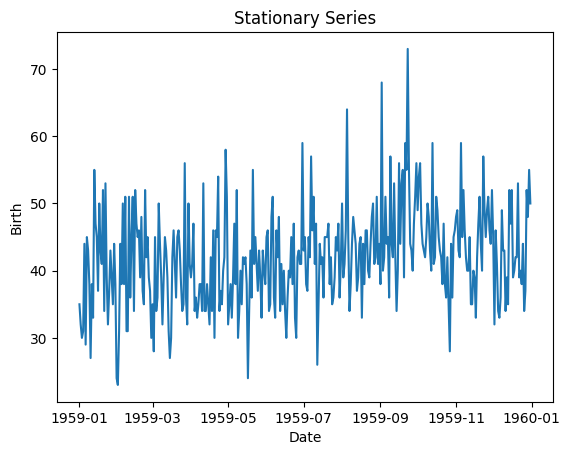

In [4]:
fig, ax = plt.subplots()
ax.plot(series)

ax.set(xlabel='Date', ylabel='Birth',
       title='Stationary Series')

plt.show()

## Performing Adfuller Test 

In [5]:
result = adfuller(series)
print("P-value :", result[1])
print("AD Fuller Statistic : %f" % result[0])
print("Crictical Values")
for key, value in result[4].items():
    print("\t",key,": %.2f" % (value))

P-value : 5.2434129901498554e-05
AD Fuller Statistic : -4.808291
Crictical Values
	 1% : -3.45
	 5% : -2.87
	 10% : -2.57


As we can see, 
1) The value is less than 0.05 has we can reject the null hypothesis. Concluding the given series in stationary.
2) statiscal value is less than critical value. we can reject the null hypothesis. Concluding the given series in stationary.

# Non Stationary Series

In [6]:
# Reading file
series1 = pd.read_csv("airline-passengers.csv", index_col=0, parse_dates = ["Month"])

In [7]:
series1

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Plotting Time series data

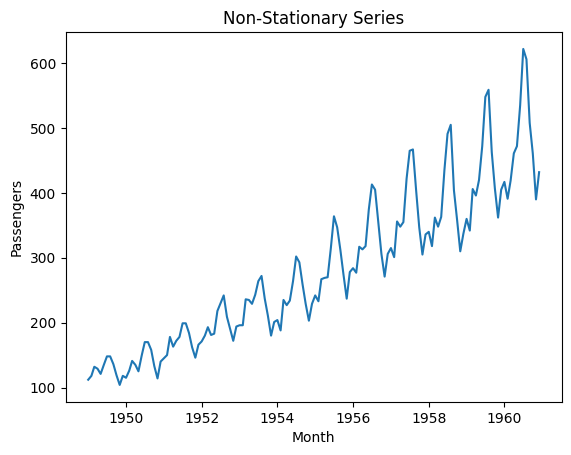

In [8]:
fig, ax = plt.subplots()
ax.plot(series1)

ax.set(xlabel='Month', ylabel='Passengers',
       title='Non-Stationary Series')

plt.show()

## Performing Adfuller Test

In [9]:
result = adfuller(series1)
print("P-value :", result[1])
print("AD Fuller Statistic : %f" % result[0])
print("Crictical Values")
for key, value in result[4].items():
    print("\t",key,": %.2f" % (value))

P-value : 0.9918802434376409
AD Fuller Statistic : 0.815369
Crictical Values
	 1% : -3.48
	 5% : -2.88
	 10% : -2.58


# Differencing 

In [39]:
from datetime import datetime

dateparse = lambda x : datetime.strptime("190" + x, '%Y-%m')
series2 = pd.read_csv("shampoo_sales.csv",parse_dates=["Month"],  index_col=0 , date_parser=dateparse)

/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_17368/3042355774.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series2 = pd.read_csv("shampoo_sales.csv",parse_dates=["Month"],  index_col=0 , date_parser=dateparse)


In [55]:
series2

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


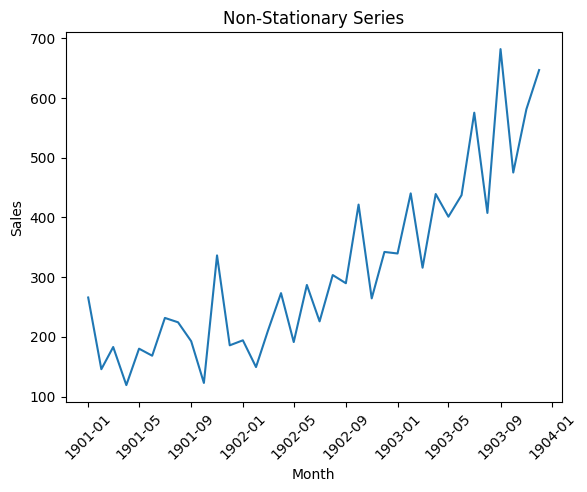

In [56]:
fig, ax = plt.subplots()
ax.plot(series2)


ax.set(xlabel='Month', ylabel='Sales',
       title='Non-Stationary Series')

plt.xticks(rotation=45)
plt.show()

## First order difference

In [69]:
# Performing first order differencing
series3 = series2.diff()
series3 = series3[1:]
series3

,Sales
Month,
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0
1901-06-01,-11.8
1901-07-01,63.3
1901-08-01,-7.3
1901-09-01,-31.7
1901-10-01,-69.9


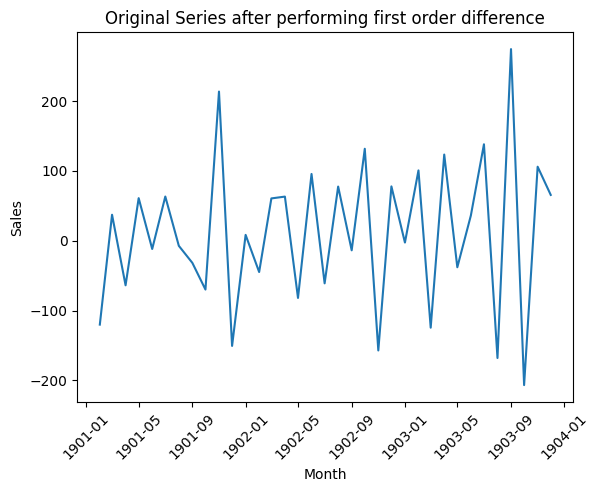

In [70]:
fig, ax = plt.subplots()
ax.plot(series3)


ax.set(xlabel='Month', ylabel='Sales',
       title='Original Series after performing first order difference')

plt.xticks(rotation=45)
plt.show()

## Second order difference

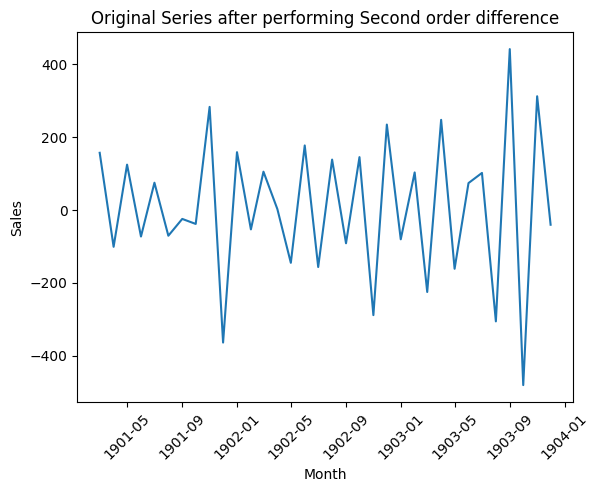

In [77]:
# Performing first order differencing
series4 = series3.diff()
series4 = series4[1:]

fig, ax = plt.subplots()
ax.plot(series4)

ax.set(xlabel='Month', ylabel='Sales',
       title='Original Series after performing Second order difference')

plt.xticks(rotation=45)
plt.show()

# Seasonal Decomposition